In [1]:
# Project name

In [2]:
print("Name of project: Machine Learning for Banks")

Name of project: Machine Learning for Banks


In [3]:
# A brief about problem statement

In [4]:
'''
Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, 
debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a 
loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates
based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit 
worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this 
will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is
to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be
easier to use than others.

The evaluation metric for this competition is Weighted F1 Score.
'''

'\nHave you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, \ndebt-to-income ratio etc. and select your interest rates? \n\nThe process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a \nloan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates\nbased on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit \nworthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this \nwill help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is\nto use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.\n\nYou can use any combination of the featu

In [5]:
# Importing required libraries

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB
import catboost as cb
from xgboost import XGBRegressor

In [7]:
# Loading dataset

In [282]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [9]:
# shape of dataset

In [10]:
print("shape of training dataset:",train.shape)
print("shape of test dataset:",test.shape)

shape of training dataset: (164309, 14)
shape of test dataset: (109541, 13)


In [11]:
# Basic stats value

In [12]:
train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [13]:
# Lets see a few rows from top of training dataset

In [14]:
train.head(4)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3


In [15]:
# A few rows from bottom

In [16]:
train.tail(4)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
164305,10164306,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female,3
164308,10164309,"9,250",10+ years,Rent,NaN,VERIFIED - income,credit_card,19.44,1,NaN,5,9,Female,2


In [17]:
# a few random rows

In [18]:
train.sample(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
53097,10053098,"18,250",10+ years,Rent,68000.0,VERIFIED - income,debt_consolidation,13.31,3,18.0,19,33,Male,3
9739,10009740,"18,000",5 years,Mortgage,120000.0,not verified,debt_consolidation,6.43,1,8.0,11,29,Male,1
82965,10082966,"13,500",10+ years,NaN,80000.0,VERIFIED - income,debt_consolidation,10.17,0,36.0,16,36,Male,2
159140,10159141,"14,300",10+ years,Rent,60000.0,not verified,credit_card,20.00,3,NaN,6,14,Male,1
4603,10004604,"25,000",6 years,NaN,NaN,VERIFIED - income source,credit_card,21.62,0,NaN,19,51,Female,1


In [19]:
# Lets see the test dataset

In [20]:
test.sample(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
61314,10225624,"10,000",4 years,Rent,48996.0,not verified,other,21.97,0,NaN,11,17,Male
49645,10213955,"14,000",< 1 year,Own,99500.0,VERIFIED - income source,debt_consolidation,28.82,0,NaN,29,46,Male
61827,10226137,"9,000",3 years,Mortgage,40000.0,VERIFIED - income,debt_consolidation,3.42,0,NaN,3,4,Female
17460,10181770,"6,000",6 years,Rent,40000.0,VERIFIED - income source,other,31.23,1,NaN,13,34,Female
104096,10268406,"20,000",3 years,Own,45000.0,VERIFIED - income,debt_consolidation,17.47,0,NaN,11,24,Male


In [21]:
# Detailed summary of train dataset

In [22]:
pd.DataFrame({"TotalMissing":train.isna().sum(),"%Missing":train.isna().mean(),"DataType":train.dtypes,"Unique":train.nunique()})

,TotalMissing,%Missing,DataType,Unique
Loan_ID,0,0.000000,int64,164309
Loan_Amount_Requested,0,0.000000,object,1290
Length_Employed,7371,0.044861,object,11
Home_Owner,25349,0.154276,object,5
Annual_Income,25102,0.152773,float64,12305
Income_Verified,0,0.000000,object,3
Purpose_Of_Loan,0,0.000000,object,14
Debt_To_Income,0,0.000000,float64,3953
Inquiries_Last_6Mo,0,0.000000,int64,9
Months_Since_Deliquency,88379,0.537883,float64,122


In [23]:
# Detailed summary of test dataset

In [24]:
pd.DataFrame({"TotalMissing":test.isna().sum(),"%Missing":test.isna().mean(),"DataType":test.dtypes,"Unique":test.nunique()})

,TotalMissing,%Missing,DataType,Unique
Loan_ID,0,0.000000,int64,109541
Loan_Amount_Requested,0,0.000000,object,1246
Length_Employed,4936,0.045061,object,11
Home_Owner,16711,0.152555,object,5
Annual_Income,16898,0.154262,float64,9028
Income_Verified,0,0.000000,object,3
Purpose_Of_Loan,0,0.000000,object,14
Debt_To_Income,0,0.000000,float64,3895
Inquiries_Last_6Mo,0,0.000000,int64,9
Months_Since_Deliquency,58859,0.537324,float64,115


In [283]:
train=pd.concat([train,test],axis=0)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [26]:
# EDA

In [27]:
# Loan id represents just as the serial no so not useful for prediction 

In [28]:
# Loan_Amount_Requested: Lets find out why it is in object cat

In [29]:
train.Loan_Amount_Requested.head(3)

0     7,000
1    30,000
2    24,725
Name: Loan_Amount_Requested, dtype: object

In [30]:
# This might be because of , in between the numbers,lets remove it

In [284]:
train["Loan_Amount_Requested"]=train.Loan_Amount_Requested.str.replace(",","")

In [32]:
# Lets try to change dtype to int

In [285]:
train["Loan_Amount_Requested"]=train.Loan_Amount_Requested.astype(int)

In [34]:
train.Loan_Amount_Requested.min(),train.Loan_Amount_Requested.max()

(500, 35000)

In [35]:
# Lets try to make this col simple so that our model learns pattern quickly

In [180]:
train['Loan_amt'] = 'na'
train.loc[(train.Loan_Amount_Requested >= 0) & (train.Loan_Amount_Requested <= 5000), 'Loan_amt'] = 'Under5k' 
train.loc[(train.Loan_Amount_Requested >= 5001) & (train.Loan_Amount_Requested <= 10000), 'Loan_amt'] = 'Under10k'
train.loc[(train.Loan_Amount_Requested >= 10001) & (train.Loan_Amount_Requested <= 15000), 'Loan_amt'] = 'Under15k'
train.loc[(train.Loan_Amount_Requested >= 15001) & (train.Loan_Amount_Requested <= 20000), 'Loan_amt'] = 'Under20k'
train.loc[(train.Loan_Amount_Requested >= 20001) & (train.Loan_Amount_Requested <= 25000), 'Loan_amt'] = 'Under25k'
train.loc[(train.Loan_Amount_Requested >= 25001) & (train.Loan_Amount_Requested <= 30000), 'Loan_amt'] = 'Under30k'
train.loc[(train.Loan_Amount_Requested >= 30001) & (train.Loan_Amount_Requested <= 35000), 'Loan_amt'] = 'Under35k'

In [37]:
# Length_Employed

In [38]:
train.Length_Employed.head(3)

0    < 1 year
1     4 years
2     7 years
Name: Length_Employed, dtype: object

In [39]:
train.Length_Employed.unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [40]:
# Lets impute missing with mode

In [286]:
train.Length_Employed.fillna(train.Length_Employed.mode()[0],inplace=True)

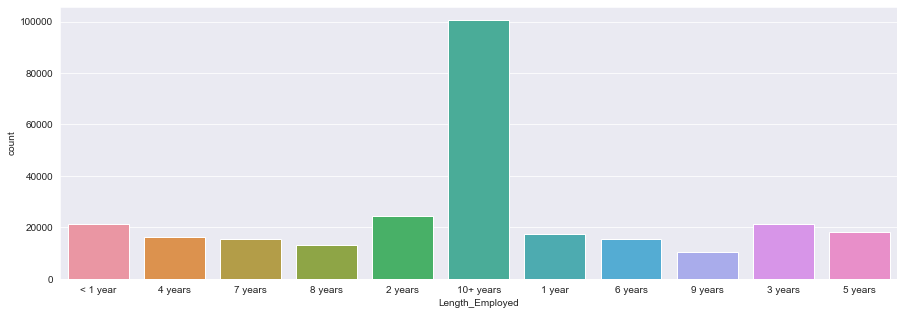

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(train["Length_Employed"])

In [43]:
# Home_Owner

In [287]:
train.Home_Owner.fillna(train.Home_Owner.mode()[0],inplace=True)

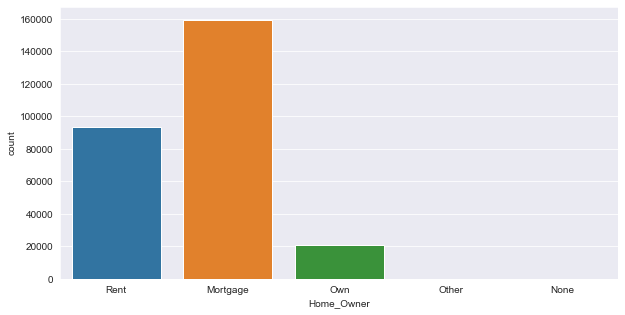

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(train["Home_Owner"])

In [46]:
# Annual_Income

In [47]:
train["Annual_Income"].min(),train["Annual_Income"].max()

(3000.0, 7500000.0)

In [288]:
train.Annual_Income.fillna(train.Annual_Income.mean(),inplace=True)

In [49]:
# Lets create some bins for easy understanding

In [184]:
train['Total_Income'] = 'na'
train.loc[(train.Annual_Income >= 0) & (train.Annual_Income <= 100000), 'Total_Income'] = 'Under1L' 
train.loc[(train.Annual_Income >= 100000.00001) & (train.Annual_Income <= 200000), 'Total_Income'] = 'Under2L'
train.loc[(train.Annual_Income >= 200000.00001) & (train.Annual_Income <= 300000), 'Total_Income'] = 'Under3L'
train.loc[(train.Annual_Income >= 300000.00001) & (train.Annual_Income <= 400000), 'Total_Income'] = 'Under4L'
train.loc[(train.Annual_Income >= 400000.00001) & (train.Annual_Income <= 500000), 'Total_Income'] = 'Under5L'
train.loc[(train.Annual_Income >= 500000.00001) & (train.Annual_Income <= 600000), 'Total_Income'] = 'Under6L'
train.loc[(train.Annual_Income >= 600000.00001) & (train.Annual_Income <= 700000), 'Total_Income'] = 'Under7L'
train.loc[(train.Annual_Income >= 700000.00001) & (train.Annual_Income <= 800000), 'Total_Income'] = 'Under8L'
train.loc[(train.Annual_Income >= 800000.00001) & (train.Annual_Income <= 900000), 'Total_Income'] = 'Under9L'
train.loc[(train.Annual_Income >= 900000.00001) & (train.Annual_Income <= 1000000), 'Total_Income'] = 'Under10L'
train.loc[(train.Annual_Income >= 1000000.00001) & (train.Annual_Income <= 5000000), 'Total_Income'] = 'Under50L'
train.loc[(train.Annual_Income >= 5000000.00001) & (train.Annual_Income <= 10000000), 'Total_Income'] = 'Under1Cr'

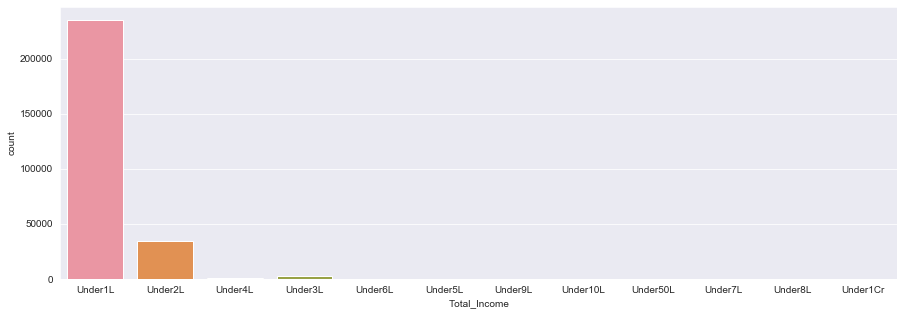

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(train["Total_Income"])

In [52]:
# Income_Verified

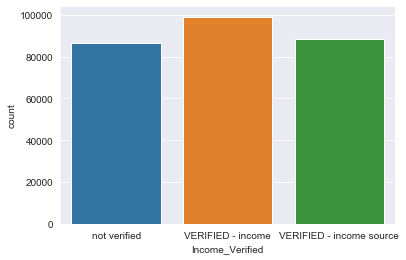

In [53]:
sns.countplot(train["Income_Verified"])

In [54]:
# Purpose_Of_Loan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

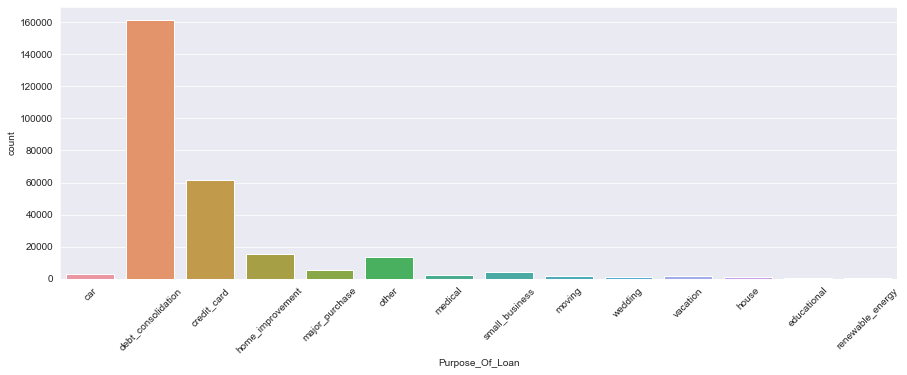

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(train["Purpose_Of_Loan"])
plt.xticks(rotation=45)

In [56]:
# Debt_To_Income

In [57]:
train["Debt_To_Income"].min(),train["Debt_To_Income"].max()

(0.0, 39.99)

In [185]:
train['Debt2Income'] = 'na'
train.loc[(train.Debt_To_Income >= 0) & (train.Debt_To_Income <= 5.0), 'Debt2Income'] = 'Under5' 
train.loc[(train.Debt_To_Income >= 5.00001) & (train.Debt_To_Income <= 10.0), 'Debt2Income'] = 'Under10'
train.loc[(train.Debt_To_Income >= 10.00001) & (train.Debt_To_Income <= 15.0), 'Debt2Income'] = 'Under15'
train.loc[(train.Debt_To_Income >= 15.00001) & (train.Debt_To_Income <= 20.0), 'Debt2Income'] = 'Under20'
train.loc[(train.Debt_To_Income >= 20.00001) & (train.Debt_To_Income <= 25.0), 'Debt2Income'] = 'Under25'
train.loc[(train.Debt_To_Income >= 25.00001) & (train.Debt_To_Income <= 30.0), 'Debt2Income'] = 'Under30'
train.loc[(train.Debt_To_Income >= 30.00001) & (train.Debt_To_Income <= 35.0), 'Debt2Income'] = 'Under35'
train.loc[(train.Debt_To_Income >= 35.00001) & (train.Debt_To_Income <= 40.0), 'Debt2Income'] = 'Under40'

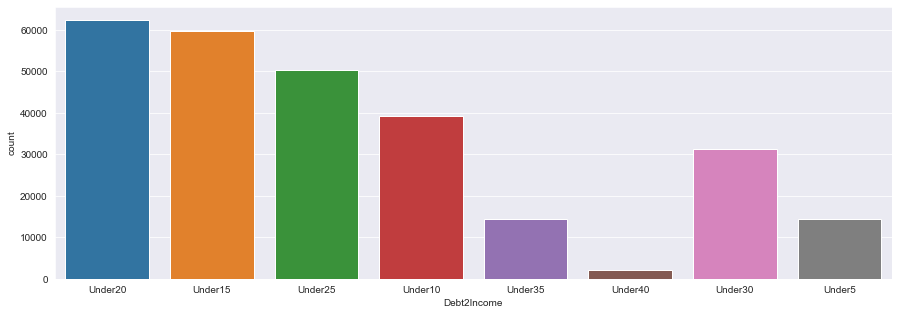

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(train["Debt2Income"])

In [60]:
# Inquiries_Last_6Mo

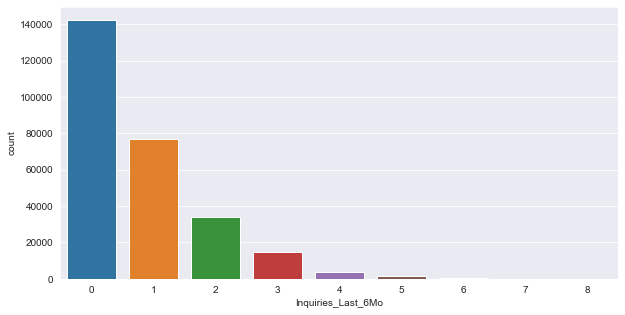

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(train["Inquiries_Last_6Mo"])

In [62]:
# Months_Since_Deliquency

In [63]:
train["Months_Since_Deliquency"].unique()

array([ nan,  17.,  16.,  68.,  13.,   6.,  64.,  10.,  63.,  33.,  22.,
        28.,   8.,  26.,  41.,  46.,  62.,  21.,  12.,  52.,   3.,  65.,
        43.,  53.,  44.,   1.,  11.,  71.,  23.,  15.,  48.,  39.,  30.,
        32.,  18.,  24.,  47.,  66.,  19.,  76.,   4.,  29.,  45.,  38.,
        56.,  37.,  20.,  35.,   2.,   9.,  34.,  14.,  59.,  36.,  50.,
        81.,  72.,  69.,  57.,  25.,   7.,  49.,  31.,  78.,  70.,  27.,
         5.,  51.,  58.,  75.,  42.,  74.,  40.,  67.,  61.,  55.,  77.,
        54.,   0.,  60.,  73.,  79.,  82.,  80.,  83.,  88., 127., 106.,
        99.,  97., 139.,  96., 119., 116.,  94., 141.,  86.,  91.,  84.,
        85.,  95.,  90.,  87., 103., 101., 121., 148.,  93., 122.,  92.,
       180., 105., 110., 129., 130., 135., 114., 102., 111.,  98., 131.,
       107., 170., 143., 109., 118., 115., 126., 149., 124., 133.,  89.,
       140.])

In [64]:
train["Months_Since_Deliquency"].min(),train["Months_Since_Deliquency"].max(),np.round(train["Months_Since_Deliquency"].mean())

(0.0, 180.0, 34.0)

In [65]:
# Filling na with mean

In [289]:
train.Months_Since_Deliquency.fillna(np.round(train["Months_Since_Deliquency"].mean()),inplace=True)

In [67]:
# Simplifying this col

In [187]:
train['Years_Deliquency'] = 'na'
train.loc[(train.Months_Since_Deliquency >= 0.0) & (train.Months_Since_Deliquency <= 12.0), 'Years_Deliquency'] = 'Under1year' 
train.loc[(train.Months_Since_Deliquency >= 13.0) & (train.Months_Since_Deliquency <= 24.0), 'Years_Deliquency'] = 'Under2year'
train.loc[(train.Months_Since_Deliquency >= 25.0) & (train.Months_Since_Deliquency <= 36.0), 'Years_Deliquency'] = 'Under3year'
train.loc[(train.Months_Since_Deliquency >= 36.0) & (train.Months_Since_Deliquency <= 48.0), 'Years_Deliquency'] = 'Under4year'
train.loc[(train.Months_Since_Deliquency >= 49.0) & (train.Months_Since_Deliquency <= 60.0), 'Years_Deliquency'] = 'Under5year'
train.loc[(train.Months_Since_Deliquency >= 61.0) & (train.Months_Since_Deliquency <= 72.0), 'Years_Deliquency'] = 'Under6year'
train.loc[(train.Months_Since_Deliquency >= 73.0) & (train.Months_Since_Deliquency <= 84.0), 'Years_Deliquency'] = 'Under7year'
train.loc[(train.Months_Since_Deliquency >= 85.0) & (train.Months_Since_Deliquency <= 96.0), 'Years_Deliquency'] = 'Under8year'
train.loc[(train.Months_Since_Deliquency >= 97.0) & (train.Months_Since_Deliquency <= 108.0), 'Years_Deliquency'] = 'Under9year'
train.loc[(train.Months_Since_Deliquency >= 109.0) & (train.Months_Since_Deliquency <= 120.0), 'Years_Deliquency'] = 'Under10year'
train.loc[(train.Months_Since_Deliquency >= 121.0) & (train.Months_Since_Deliquency <= 132.0), 'Years_Deliquency'] = 'Under11year'
train.loc[(train.Months_Since_Deliquency >= 133.0) & (train.Months_Since_Deliquency <= 144.0), 'Years_Deliquency'] = 'Under12year'
train.loc[(train.Months_Since_Deliquency >= 145.0) & (train.Months_Since_Deliquency <= 156.0), 'Years_Deliquency'] = 'Under13year'
train.loc[(train.Months_Since_Deliquency >= 157.0) & (train.Months_Since_Deliquency <= 168.0), 'Years_Deliquency'] = 'Under14year'
train.loc[(train.Months_Since_Deliquency >= 169.0) & (train.Months_Since_Deliquency <= 180.0), 'Years_Deliquency'] = 'Under15year'

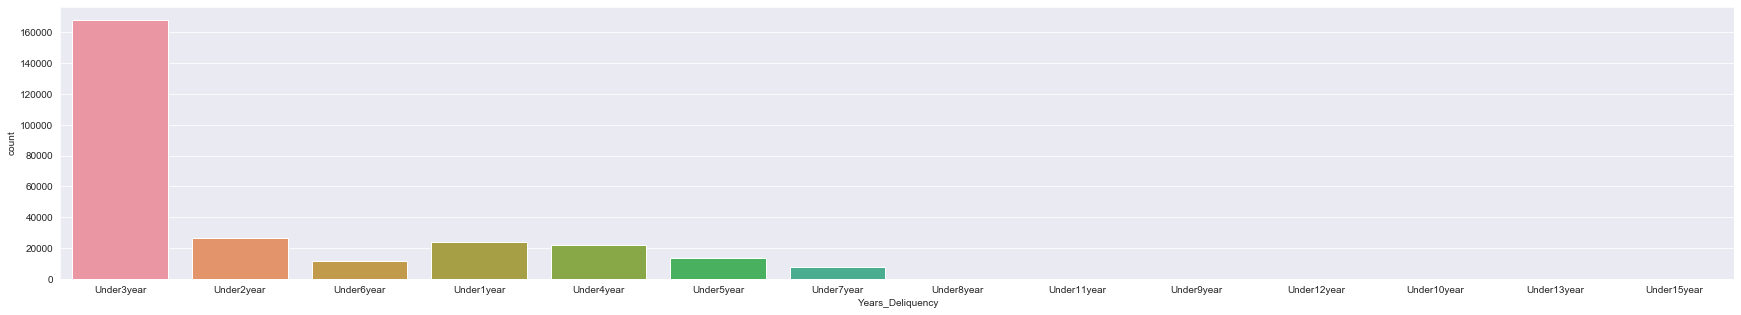

In [69]:
plt.figure(figsize=(30,5))
sns.countplot(train["Years_Deliquency"])

In [70]:
# Number_Open_Accounts

In [71]:
train["Number_Open_Accounts"].min(),train["Number_Open_Accounts"].max()

(0, 84)

In [188]:
train['Total_Accounts'] = 'na'
train.loc[(train.Number_Open_Accounts >= 0) & (train.Number_Open_Accounts <= 10), 'Total_Accounts'] = 'Under10'
train.loc[(train.Number_Open_Accounts >= 11) & (train.Number_Open_Accounts <= 20), 'Total_Accounts'] = 'Under20'
train.loc[(train.Number_Open_Accounts >= 21) & (train.Number_Open_Accounts <= 30), 'Total_Accounts'] = 'Under30'
train.loc[(train.Number_Open_Accounts >= 31) & (train.Number_Open_Accounts <= 40), 'Total_Accounts'] = 'Under40'
train.loc[(train.Number_Open_Accounts >= 41) & (train.Number_Open_Accounts <= 50), 'Total_Accounts'] = 'Under50'
train.loc[(train.Number_Open_Accounts >= 51) & (train.Number_Open_Accounts <= 60), 'Total_Accounts'] = 'Under60'
train.loc[(train.Number_Open_Accounts >= 61) & (train.Number_Open_Accounts <= 70), 'Total_Accounts'] = 'Under70'
train.loc[(train.Number_Open_Accounts >= 71) & (train.Number_Open_Accounts <= 80), 'Total_Accounts'] = 'Under80'
train.loc[(train.Number_Open_Accounts >= 81) & (train.Number_Open_Accounts <= 90), 'Total_Accounts'] = 'Under90'

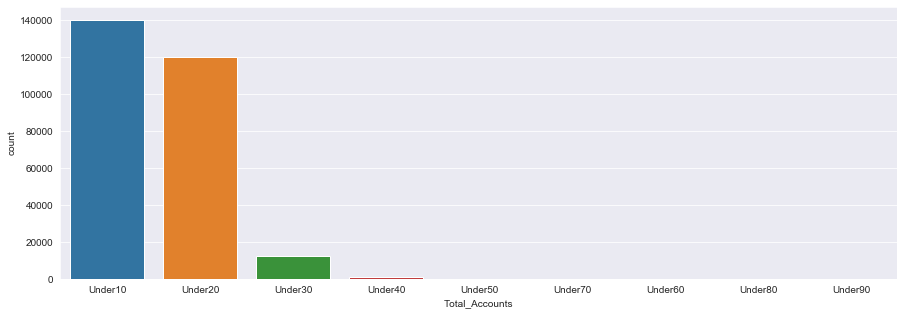

In [73]:
plt.figure(figsize=(15,5))
sns.countplot(train["Total_Accounts"])

In [74]:
# Gender

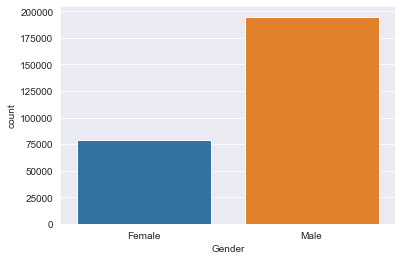

In [75]:
sns.countplot(train["Gender"])

In [76]:
# Target col: Interest_Rate

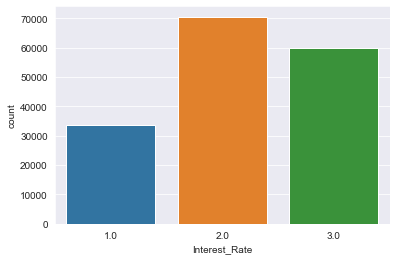

In [77]:
sns.countplot(train["Interest_Rate"])

In [78]:
# Lets look at the dataset

In [79]:
train.head(4)

,Annual_Income,Debt_To_Income,Gender,Home_Owner,Income_Verified,Inquiries_Last_6Mo,Interest_Rate,Length_Employed,Loan_Amount_Requested,Loan_ID,Months_Since_Deliquency,Number_Open_Accounts,Purpose_Of_Loan,Total_Accounts,Loan_amt,Total_Income,Debt2Income,Years_Deliquency
0,68000.000000,18.37,Female,Rent,not verified,0,1.0,< 1 year,7000,10000001,34.0,9,car,Under10,Under10k,Under1L,Under20,Under3year
1,73392.793977,14.93,Female,Mortgage,VERIFIED - income,0,3.0,4 years,30000,10000002,17.0,12,debt_consolidation,Under20,Under30k,Under1L,Under15,Under2year
2,75566.400000,15.88,Male,Mortgage,VERIFIED - income source,0,3.0,7 years,24725,10000003,34.0,12,debt_consolidation,Under20,Under25k,Under1L,Under20,Under3year
3,56160.000000,14.34,Male,Mortgage,VERIFIED - income source,3,3.0,< 1 year,16000,10000004,34.0,16,debt_consolidation,Under20,Under20k,Under1L,Under15,Under3year


In [80]:
# Encoding all categorical values

In [81]:
# Length_Employed

In [82]:
train["Length_Employed"].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', '6 years', '9 years', '3 years', '5 years'],
      dtype=object)

In [307]:
lemp = {"< 1 year": 0, "1 year": 1,"2 years":2,"3 years":3,"4 years":4,"5 years":5,"6 years":6,"7 years":7,
       "8 years": 8, "9 years": 9,"10+ years":10}
train['Length_Employed'] = train['Length_Employed'].map(lemp)

In [84]:
# Home_Owner

In [85]:
train["Home_Owner"].unique()

array(['Rent', 'Mortgage', 'Own', 'Other', 'None'], dtype=object)

In [86]:
# Using get dummies to encode

In [290]:
home=pd.get_dummies(train["Home_Owner"],drop_first=True,prefix="HO_")

In [88]:
# concating with original dataset

In [291]:
train=pd.concat([train,home],axis=1)

In [90]:
# dropping original col

In [292]:
del train["Home_Owner"]

In [92]:
# Income_Verified

In [93]:
train["Income_Verified"].unique()

array(['not verified', 'VERIFIED - income', 'VERIFIED - income source'],
      dtype=object)

In [293]:
inc=pd.get_dummies(train["Income_Verified"],drop_first=True)

In [294]:
train=pd.concat([train,inc],axis=1)

In [295]:
del train["Income_Verified"]

In [97]:
# Purpose_Of_Loan

In [98]:
train["Purpose_Of_Loan"].unique()

array(['car', 'debt_consolidation', 'credit_card', 'home_improvement',
       'major_purchase', 'other', 'medical', 'small_business', 'moving',
       'wedding', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype=object)

In [99]:
le=LabelEncoder()

In [296]:
train["Purpose_Of_Loan"]=le.fit_transform(train["Purpose_Of_Loan"])

In [101]:
# Total_Accounts

In [102]:
train["Total_Accounts"].unique()

array(['Under10', 'Under20', 'Under30', 'Under40', 'Under50', 'Under70',
       'Under60', 'Under80', 'Under90'], dtype=object)

In [197]:
tacc = {"Under10": 0, "Under20": 1,"Under30":2,"Under40":3,"Under50":4,"Under60":5,"Under70":6,"Under80":7,"Under90":8}
train['Total_Accounts'] = train['Total_Accounts'].map(tacc)

In [104]:
# Gender

In [105]:
train["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [297]:
gen = {"Female": 0, "Male": 1}
train["Gender"] = train['Gender'].map(gen)

In [107]:
# Loan_amt

In [108]:
train["Loan_amt"].unique()

array(['Under10k', 'Under30k', 'Under25k', 'Under20k', 'Under5k',
       'Under15k', 'Under35k'], dtype=object)

In [199]:
lamt = {"Under5k": 0, "Under10k": 1,"Under15k":2,"Under20k":3,"Under25k":4,"Under30k":5,"Under35k":6}
train['Loan_amt'] = train['Loan_amt'].map(lamt)

In [110]:
# Total_Income

In [111]:
train["Total_Income"].unique()

array(['Under1L', 'Under2L', 'Under4L', 'Under3L', 'Under6L', 'Under5L',
       'Under9L', 'Under10L', 'Under50L', 'Under7L', 'Under8L',
       'Under1Cr'], dtype=object)

In [200]:
tinc = {"Under1L": 0, "Under2L": 1,"Under3L":2,"Under4L":3,"Under5L":4,"Under6L":5,"Under7L":6,"Under8L":7,
       "Under9L": 8, "Under10L": 9,"Under50L":10,"Under1Cr":11}
train['Total_Income'] = train['Total_Income'].map(tinc)

In [113]:
# Debt2Income

In [114]:
train["Debt2Income"].unique()

array(['Under20', 'Under15', 'Under25', 'Under10', 'Under35', 'Under40',
       'Under30', 'Under5'], dtype=object)

In [201]:
dinc = {"Under5": 0, "Under10": 1,"Under15":2,"Under20":3,"Under25":4,"Under30":5,"Under35":6,"Under40":7}
train['Debt2Income'] = train['Debt2Income'].map(dinc)

In [116]:
# Years_Deliquency

In [117]:
train["Years_Deliquency"].unique()

array(['Under3year', 'Under2year', 'Under6year', 'Under1year',
       'Under4year', 'Under5year', 'Under7year', 'Under8year',
       'Under11year', 'Under9year', 'Under12year', 'Under10year',
       'Under13year', 'Under15year'], dtype=object)

In [202]:
ydel = {"Under1year": 0, "Under2year": 1,"Under3year":2,"Under4year":3,"Under5year":4,"Under6year":5,"Under7year":6,"Under8year":7,
       "Under9year": 8, "Under10year": 9,"Under11year":10,"Under12year":11,"Under13year":12,"Under14year":13,"Under15year":14}
train['Years_Deliquency'] = train['Years_Deliquency'].map(ydel)

In [119]:
# Lets round off Annual income

In [298]:
train["Annual_Income"]=np.round(train["Annual_Income"])
train["Annual_Income"]=train["Annual_Income"].astype(int)

In [121]:
# Lets have a look at the train dataset

In [299]:
train.columns

Index(['Annual_Income', 'Debt_To_Income', 'Gender', 'Inquiries_Last_6Mo',
       'Interest_Rate', 'Length_Employed', 'Loan_Amount_Requested', 'Loan_ID',
       'Months_Since_Deliquency', 'Number_Open_Accounts', 'Purpose_Of_Loan',
       'Total_Accounts', 'HO__None', 'HO__Other', 'HO__Own', 'HO__Rent',
       'VERIFIED - income source', 'not verified'],
      dtype='object')

In [204]:
train.sample(4) 

,Annual_Income,Debt_To_Income,Gender,Inquiries_Last_6Mo,Interest_Rate,Length_Employed,Loan_Amount_Requested,Loan_ID,Months_Since_Deliquency,Number_Open_Accounts,...,Loan_amt,Total_Income,Debt2Income,Years_Deliquency,HO__None,HO__Other,HO__Own,HO__Rent,VERIFIED - income source,not verified
15944,86000,21.87,0,1,3.0,4,26500,10015945,34.0,7,...,5,0,4,2,0,0,0,1,1,0
118794,45000,12.03,0,0,2.0,10,9000,10118795,18.0,10,...,1,0,2,1,0,0,0,0,1,0
25975,37300,26.48,1,0,2.0,10,6000,10025976,34.0,10,...,1,0,5,2,0,0,0,0,1,0
42159,92000,22.58,1,1,NaN,10,25000,10206469,34.0,11,...,4,0,4,2,0,0,0,0,1,0


In [209]:
new_train=train.drop(["Annual_Income","Debt_To_Income","Loan_Amount_Requested","Months_Since_Deliquency","Number_Open_Accounts","Loan_ID"],axis=1)

In [347]:
train1=train.iloc[:164309]

In [348]:
test=train.iloc[164309:]

In [346]:
del train["Months_Since_Deliquency"]

In [127]:
# we have processed the dataset now we will apply ml algo, lets split it into dependent and independent variable

In [349]:
del test["Interest_Rate"]

In [350]:
y=train1["Interest_Rate"]
x=train1.drop("Interest_Rate",axis=1)

In [329]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1=pd.DataFrame(x1)

In [330]:
sc=StandardScaler()
test1=sc.fit_transform(test)
test1=pd.DataFrame(test1)

In [130]:
# Lets check the feature importance

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.07425728e-01 1.10076273e-01 2.71210992e-02 4.18790344e-02
 7.60470302e-02 9.98517596e-02 1.07484611e-01 6.43376050e-02
 9.24837698e-02 5.91622897e-02 2.74402654e-02 3.81679867e-02
 1.52489563e-02 4.30290407e-02 3.99012999e-02 6.07580848e-05
 1.84276741e-04 1.21590441e-02 1.12084913e-02 9.34898115e-03
 1.73816992e-02]


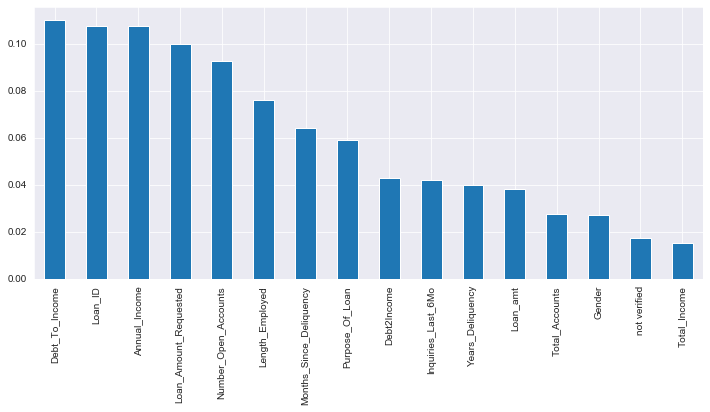

In [261]:
fig=plt.figure(figsize=(12,5))
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='bar')
plt.show()

In [263]:
train1=train1.drop(["Total_Accounts","Gender","not verified","Total_Income"],axis=1)

In [132]:
# splitting the dataset using train test split

In [351]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [134]:
# Printing the shape of splitted dataset

In [313]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (115016, 17)
shape of y_train: (115016,)
shape of x_test: (49293, 17)
shape of y_test: (49293,)


In [136]:
# Applying machine learning algorithm on train dataset 

In [314]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
prediction=etc.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Weighted F1 Score: 0.4674561869511993


In [315]:
mn=MultinomialNB()
mn.fit(x_train,y_train)
prediction=mn.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

Weighted F1 Score: 0.43024392643952747


In [316]:
cnb=ComplementNB()
cnb.fit(x_train,y_train)
prediction=cnb.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

Weighted F1 Score: 0.4331998438018961


In [317]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
prediction=bnb.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

Weighted F1 Score: 0.4188362672756368


In [318]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Weighted F1 Score: 0.4025086192644891


In [319]:
nb=GaussianNB()
nb.fit(x_train,y_train)
prediction=nb.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

Weighted F1 Score: 0.42826645945006814


In [320]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
prediction=bc.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

Weighted F1 Score: 0.472463883160686


In [273]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Weighted F1 Score: 0.46420939325936245


In [274]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

Weighted F1 Score: 0.42082259742456185


In [352]:
xgb=XGBClassifier()
prediction= xgb.fit(x_train,y_train).predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

Weighted F1 Score: 0.5125602330751737


In [353]:
cat_rg1 = cb.CatBoostClassifier()
cat_rg1.fit(x_train,y_train)
prediction=cat_rg1.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

Learning rate set to 0.100791
0:	learn: 1.0797493	total: 57.5ms	remaining: 57.5s
1:	learn: 1.0639326	total: 108ms	remaining: 54.1s
2:	learn: 1.0509053	total: 164ms	remaining: 54.5s
3:	learn: 1.0392999	total: 233ms	remaining: 58s
4:	learn: 1.0300489	total: 289ms	remaining: 57.5s
5:	learn: 1.0224337	total: 339ms	remaining: 56.1s
6:	learn: 1.0153652	total: 399ms	remaining: 56.6s
7:	learn: 1.0087603	total: 454ms	remaining: 56.3s
8:	learn: 1.0033818	total: 504ms	remaining: 55.5s
9:	learn: 0.9987571	total: 567ms	remaining: 56.1s
10:	learn: 0.9945463	total: 624ms	remaining: 56.1s
11:	learn: 0.9907756	total: 678ms	remaining: 55.8s
12:	learn: 0.9873924	total: 726ms	remaining: 55.1s
13:	learn: 0.9842238	total: 782ms	remaining: 55.1s
14:	learn: 0.9816168	total: 842ms	remaining: 55.3s
15:	learn: 0.9790623	total: 907ms	remaining: 55.8s
16:	learn: 0.9768675	total: 961ms	remaining: 55.5s
17:	learn: 0.9749997	total: 1.01s	remaining: 55.3s
18:	learn: 0.9731227	total: 1.07s	remaining: 55.4s
19:	learn: 0

163:	learn: 0.9335137	total: 8.71s	remaining: 44.4s
164:	learn: 0.9334173	total: 8.77s	remaining: 44.4s
165:	learn: 0.9333462	total: 8.81s	remaining: 44.3s
166:	learn: 0.9332549	total: 8.86s	remaining: 44.2s
167:	learn: 0.9331643	total: 8.92s	remaining: 44.2s
168:	learn: 0.9330809	total: 8.98s	remaining: 44.1s
169:	learn: 0.9329590	total: 9.05s	remaining: 44.2s
170:	learn: 0.9328623	total: 9.13s	remaining: 44.2s
171:	learn: 0.9327452	total: 9.2s	remaining: 44.3s
172:	learn: 0.9326437	total: 9.25s	remaining: 44.2s
173:	learn: 0.9325232	total: 9.3s	remaining: 44.1s
174:	learn: 0.9324363	total: 9.35s	remaining: 44.1s
175:	learn: 0.9323226	total: 9.4s	remaining: 44s
176:	learn: 0.9322306	total: 9.45s	remaining: 43.9s
177:	learn: 0.9321125	total: 9.5s	remaining: 43.9s
178:	learn: 0.9320409	total: 9.56s	remaining: 43.8s
179:	learn: 0.9319374	total: 9.61s	remaining: 43.8s
180:	learn: 0.9318500	total: 9.65s	remaining: 43.7s
181:	learn: 0.9317772	total: 9.71s	remaining: 43.6s
182:	learn: 0.9316

326:	learn: 0.9202587	total: 17.2s	remaining: 35.3s
327:	learn: 0.9201923	total: 17.2s	remaining: 35.3s
328:	learn: 0.9201055	total: 17.3s	remaining: 35.2s
329:	learn: 0.9200715	total: 17.3s	remaining: 35.1s
330:	learn: 0.9199916	total: 17.4s	remaining: 35.1s
331:	learn: 0.9199171	total: 17.4s	remaining: 35s
332:	learn: 0.9198596	total: 17.5s	remaining: 35s
333:	learn: 0.9197823	total: 17.5s	remaining: 34.9s
334:	learn: 0.9197228	total: 17.6s	remaining: 34.9s
335:	learn: 0.9196801	total: 17.6s	remaining: 34.8s
336:	learn: 0.9196286	total: 17.7s	remaining: 34.8s
337:	learn: 0.9195634	total: 17.7s	remaining: 34.7s
338:	learn: 0.9194904	total: 17.8s	remaining: 34.7s
339:	learn: 0.9194299	total: 17.8s	remaining: 34.6s
340:	learn: 0.9193824	total: 17.9s	remaining: 34.5s
341:	learn: 0.9193220	total: 17.9s	remaining: 34.5s
342:	learn: 0.9192618	total: 18s	remaining: 34.4s
343:	learn: 0.9191630	total: 18s	remaining: 34.4s
344:	learn: 0.9190909	total: 18.1s	remaining: 34.3s
345:	learn: 0.918994

486:	learn: 0.9099365	total: 25.7s	remaining: 27s
487:	learn: 0.9098805	total: 25.7s	remaining: 27s
488:	learn: 0.9098239	total: 25.8s	remaining: 26.9s
489:	learn: 0.9097431	total: 25.8s	remaining: 26.9s
490:	learn: 0.9097094	total: 25.9s	remaining: 26.8s
491:	learn: 0.9096407	total: 25.9s	remaining: 26.8s
492:	learn: 0.9096227	total: 26s	remaining: 26.7s
493:	learn: 0.9095720	total: 26s	remaining: 26.7s
494:	learn: 0.9095271	total: 26.1s	remaining: 26.6s
495:	learn: 0.9095074	total: 26.2s	remaining: 26.6s
496:	learn: 0.9094680	total: 26.2s	remaining: 26.5s
497:	learn: 0.9094337	total: 26.2s	remaining: 26.5s
498:	learn: 0.9093984	total: 26.3s	remaining: 26.4s
499:	learn: 0.9093525	total: 26.4s	remaining: 26.4s
500:	learn: 0.9092817	total: 26.4s	remaining: 26.3s
501:	learn: 0.9092513	total: 26.5s	remaining: 26.3s
502:	learn: 0.9091912	total: 26.5s	remaining: 26.2s
503:	learn: 0.9091029	total: 26.6s	remaining: 26.1s
504:	learn: 0.9090406	total: 26.6s	remaining: 26.1s
505:	learn: 0.908965

648:	learn: 0.9008560	total: 34.7s	remaining: 18.7s
649:	learn: 0.9008018	total: 34.7s	remaining: 18.7s
650:	learn: 0.9007491	total: 34.8s	remaining: 18.6s
651:	learn: 0.9007099	total: 34.8s	remaining: 18.6s
652:	learn: 0.9006655	total: 34.9s	remaining: 18.5s
653:	learn: 0.9005913	total: 34.9s	remaining: 18.5s
654:	learn: 0.9005538	total: 35s	remaining: 18.4s
655:	learn: 0.9005229	total: 35.1s	remaining: 18.4s
656:	learn: 0.9004654	total: 35.1s	remaining: 18.3s
657:	learn: 0.9003974	total: 35.2s	remaining: 18.3s
658:	learn: 0.9003238	total: 35.2s	remaining: 18.2s
659:	learn: 0.9002937	total: 35.3s	remaining: 18.2s
660:	learn: 0.9002490	total: 35.3s	remaining: 18.1s
661:	learn: 0.9001771	total: 35.4s	remaining: 18.1s
662:	learn: 0.9000962	total: 35.4s	remaining: 18s
663:	learn: 0.9000595	total: 35.5s	remaining: 18s
664:	learn: 0.8999960	total: 35.6s	remaining: 17.9s
665:	learn: 0.8999587	total: 35.6s	remaining: 17.9s
666:	learn: 0.8999110	total: 35.7s	remaining: 17.8s
667:	learn: 0.8998

809:	learn: 0.8923297	total: 43.3s	remaining: 10.2s
810:	learn: 0.8922559	total: 43.3s	remaining: 10.1s
811:	learn: 0.8922045	total: 43.4s	remaining: 10s
812:	learn: 0.8921373	total: 43.4s	remaining: 9.99s
813:	learn: 0.8920727	total: 43.5s	remaining: 9.94s
814:	learn: 0.8919929	total: 43.5s	remaining: 9.88s
815:	learn: 0.8919259	total: 43.6s	remaining: 9.83s
816:	learn: 0.8918909	total: 43.7s	remaining: 9.78s
817:	learn: 0.8918363	total: 43.7s	remaining: 9.72s
818:	learn: 0.8917962	total: 43.8s	remaining: 9.67s
819:	learn: 0.8917299	total: 43.8s	remaining: 9.62s
820:	learn: 0.8916823	total: 43.9s	remaining: 9.57s
821:	learn: 0.8916256	total: 43.9s	remaining: 9.51s
822:	learn: 0.8915650	total: 44s	remaining: 9.46s
823:	learn: 0.8915229	total: 44s	remaining: 9.41s
824:	learn: 0.8914453	total: 44.1s	remaining: 9.35s
825:	learn: 0.8913882	total: 44.1s	remaining: 9.3s
826:	learn: 0.8913281	total: 44.2s	remaining: 9.25s
827:	learn: 0.8912853	total: 44.3s	remaining: 9.19s
828:	learn: 0.89122

969:	learn: 0.8841231	total: 52.2s	remaining: 1.61s
970:	learn: 0.8840837	total: 52.2s	remaining: 1.56s
971:	learn: 0.8840097	total: 52.3s	remaining: 1.5s
972:	learn: 0.8839724	total: 52.3s	remaining: 1.45s
973:	learn: 0.8839378	total: 52.4s	remaining: 1.4s
974:	learn: 0.8838747	total: 52.4s	remaining: 1.34s
975:	learn: 0.8838383	total: 52.5s	remaining: 1.29s
976:	learn: 0.8837979	total: 52.5s	remaining: 1.24s
977:	learn: 0.8837514	total: 52.6s	remaining: 1.18s
978:	learn: 0.8837066	total: 52.6s	remaining: 1.13s
979:	learn: 0.8836757	total: 52.7s	remaining: 1.07s
980:	learn: 0.8836140	total: 52.8s	remaining: 1.02s
981:	learn: 0.8835760	total: 52.8s	remaining: 968ms
982:	learn: 0.8835296	total: 52.9s	remaining: 915ms
983:	learn: 0.8834608	total: 52.9s	remaining: 861ms
984:	learn: 0.8834113	total: 53s	remaining: 807ms
985:	learn: 0.8833513	total: 53.1s	remaining: 753ms
986:	learn: 0.8832897	total: 53.1s	remaining: 700ms
987:	learn: 0.8832349	total: 53.2s	remaining: 646ms
988:	learn: 0.88

In [278]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
prediction=sgd.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

Weighted F1 Score: 0.10870174580608326


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [279]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("Weighted F1 Score:",f1_score(y_test, prediction,average='weighted'))

Weighted F1 Score: 0.3968962767230415


In [ ]:
# Applying best model on test dataset

In [335]:
cat = cb.CatBoostClassifier()
cat.fit(x1,y)
prediction=cat.predict(test1)

Learning rate set to 0.102641
0:	learn: 1.0794579	total: 86.7ms	remaining: 1m 26s
1:	learn: 1.0632423	total: 162ms	remaining: 1m 21s
2:	learn: 1.0501140	total: 253ms	remaining: 1m 24s
3:	learn: 1.0388240	total: 340ms	remaining: 1m 24s
4:	learn: 1.0294103	total: 429ms	remaining: 1m 25s
5:	learn: 1.0207997	total: 510ms	remaining: 1m 24s
6:	learn: 1.0135011	total: 587ms	remaining: 1m 23s
7:	learn: 1.0069478	total: 662ms	remaining: 1m 22s
8:	learn: 1.0013296	total: 744ms	remaining: 1m 21s
9:	learn: 0.9966363	total: 831ms	remaining: 1m 22s
10:	learn: 0.9921690	total: 927ms	remaining: 1m 23s
11:	learn: 0.9883751	total: 1.02s	remaining: 1m 23s
12:	learn: 0.9851487	total: 1.11s	remaining: 1m 24s
13:	learn: 0.9817273	total: 1.21s	remaining: 1m 25s
14:	learn: 0.9785713	total: 1.3s	remaining: 1m 25s
15:	learn: 0.9758697	total: 1.38s	remaining: 1m 25s
16:	learn: 0.9726162	total: 1.46s	remaining: 1m 24s
17:	learn: 0.9702746	total: 1.54s	remaining: 1m 23s
18:	learn: 0.9680706	total: 1.62s	remaining:

157:	learn: 0.9188273	total: 12.7s	remaining: 1m 7s
158:	learn: 0.9186255	total: 12.7s	remaining: 1m 7s
159:	learn: 0.9185297	total: 12.8s	remaining: 1m 7s
160:	learn: 0.9184276	total: 12.9s	remaining: 1m 7s
161:	learn: 0.9183392	total: 13s	remaining: 1m 7s
162:	learn: 0.9182587	total: 13s	remaining: 1m 6s
163:	learn: 0.9181124	total: 13.1s	remaining: 1m 6s
164:	learn: 0.9180166	total: 13.2s	remaining: 1m 6s
165:	learn: 0.9178642	total: 13.3s	remaining: 1m 6s
166:	learn: 0.9177123	total: 13.4s	remaining: 1m 6s
167:	learn: 0.9176394	total: 13.4s	remaining: 1m 6s
168:	learn: 0.9175285	total: 13.5s	remaining: 1m 6s
169:	learn: 0.9174367	total: 13.6s	remaining: 1m 6s
170:	learn: 0.9173645	total: 13.7s	remaining: 1m 6s
171:	learn: 0.9172620	total: 13.8s	remaining: 1m 6s
172:	learn: 0.9171419	total: 13.8s	remaining: 1m 6s
173:	learn: 0.9170838	total: 13.9s	remaining: 1m 6s
174:	learn: 0.9169880	total: 14s	remaining: 1m 5s
175:	learn: 0.9169147	total: 14.1s	remaining: 1m 5s
176:	learn: 0.9168

318:	learn: 0.9069015	total: 25.5s	remaining: 54.4s
319:	learn: 0.9068207	total: 25.5s	remaining: 54.3s
320:	learn: 0.9067879	total: 25.6s	remaining: 54.2s
321:	learn: 0.9067409	total: 25.7s	remaining: 54.1s
322:	learn: 0.9066873	total: 25.8s	remaining: 54s
323:	learn: 0.9066064	total: 25.9s	remaining: 53.9s
324:	learn: 0.9065447	total: 25.9s	remaining: 53.9s
325:	learn: 0.9064974	total: 26s	remaining: 53.8s
326:	learn: 0.9064151	total: 26.1s	remaining: 53.7s
327:	learn: 0.9063855	total: 26.2s	remaining: 53.6s
328:	learn: 0.9063183	total: 26.2s	remaining: 53.5s
329:	learn: 0.9062584	total: 26.3s	remaining: 53.4s
330:	learn: 0.9062251	total: 26.4s	remaining: 53.3s
331:	learn: 0.9061430	total: 26.5s	remaining: 53.3s
332:	learn: 0.9060631	total: 26.5s	remaining: 53.2s
333:	learn: 0.9060113	total: 26.6s	remaining: 53.1s
334:	learn: 0.9059345	total: 26.7s	remaining: 53s
335:	learn: 0.9058662	total: 26.8s	remaining: 52.9s
336:	learn: 0.9057908	total: 26.9s	remaining: 52.8s
337:	learn: 0.9057

477:	learn: 0.8981672	total: 38s	remaining: 41.5s
478:	learn: 0.8981133	total: 38s	remaining: 41.4s
479:	learn: 0.8980792	total: 38.1s	remaining: 41.3s
480:	learn: 0.8980409	total: 38.2s	remaining: 41.2s
481:	learn: 0.8979905	total: 38.3s	remaining: 41.1s
482:	learn: 0.8979366	total: 38.3s	remaining: 41s
483:	learn: 0.8979043	total: 38.4s	remaining: 41s
484:	learn: 0.8978211	total: 38.5s	remaining: 40.9s
485:	learn: 0.8977719	total: 38.6s	remaining: 40.8s
486:	learn: 0.8977212	total: 38.7s	remaining: 40.7s
487:	learn: 0.8976893	total: 38.7s	remaining: 40.6s
488:	learn: 0.8976131	total: 38.8s	remaining: 40.6s
489:	learn: 0.8975649	total: 38.9s	remaining: 40.5s
490:	learn: 0.8975145	total: 39s	remaining: 40.4s
491:	learn: 0.8974435	total: 39s	remaining: 40.3s
492:	learn: 0.8973865	total: 39.1s	remaining: 40.2s
493:	learn: 0.8973235	total: 39.2s	remaining: 40.2s
494:	learn: 0.8973000	total: 39.3s	remaining: 40.1s
495:	learn: 0.8972656	total: 39.3s	remaining: 40s
496:	learn: 0.8972193	tota

638:	learn: 0.8904893	total: 50.3s	remaining: 28.4s
639:	learn: 0.8904516	total: 50.3s	remaining: 28.3s
640:	learn: 0.8903828	total: 50.4s	remaining: 28.2s
641:	learn: 0.8903259	total: 50.5s	remaining: 28.2s
642:	learn: 0.8902819	total: 50.6s	remaining: 28.1s
643:	learn: 0.8902573	total: 50.6s	remaining: 28s
644:	learn: 0.8902141	total: 50.7s	remaining: 27.9s
645:	learn: 0.8901568	total: 50.8s	remaining: 27.8s
646:	learn: 0.8901046	total: 50.9s	remaining: 27.8s
647:	learn: 0.8900666	total: 51s	remaining: 27.7s
648:	learn: 0.8900172	total: 51.1s	remaining: 27.6s
649:	learn: 0.8899797	total: 51.1s	remaining: 27.5s
650:	learn: 0.8899326	total: 51.2s	remaining: 27.5s
651:	learn: 0.8898905	total: 51.3s	remaining: 27.4s
652:	learn: 0.8898449	total: 51.4s	remaining: 27.3s
653:	learn: 0.8897855	total: 51.4s	remaining: 27.2s
654:	learn: 0.8897304	total: 51.5s	remaining: 27.1s
655:	learn: 0.8896744	total: 51.6s	remaining: 27.1s
656:	learn: 0.8896349	total: 51.7s	remaining: 27s
657:	learn: 0.8895

800:	learn: 0.8832933	total: 1m 3s	remaining: 15.7s
801:	learn: 0.8832354	total: 1m 3s	remaining: 15.6s
802:	learn: 0.8831935	total: 1m 3s	remaining: 15.5s
803:	learn: 0.8831702	total: 1m 3s	remaining: 15.4s
804:	learn: 0.8831343	total: 1m 3s	remaining: 15.4s
805:	learn: 0.8830971	total: 1m 3s	remaining: 15.3s
806:	learn: 0.8830496	total: 1m 3s	remaining: 15.2s
807:	learn: 0.8830338	total: 1m 3s	remaining: 15.1s
808:	learn: 0.8829952	total: 1m 3s	remaining: 15s
809:	learn: 0.8829563	total: 1m 3s	remaining: 15s
810:	learn: 0.8829133	total: 1m 3s	remaining: 14.9s
811:	learn: 0.8828544	total: 1m 3s	remaining: 14.8s
812:	learn: 0.8828293	total: 1m 4s	remaining: 14.7s
813:	learn: 0.8828141	total: 1m 4s	remaining: 14.6s
814:	learn: 0.8827731	total: 1m 4s	remaining: 14.6s
815:	learn: 0.8827532	total: 1m 4s	remaining: 14.5s
816:	learn: 0.8827095	total: 1m 4s	remaining: 14.4s
817:	learn: 0.8826757	total: 1m 4s	remaining: 14.3s
818:	learn: 0.8826265	total: 1m 4s	remaining: 14.2s
819:	learn: 0.88

959:	learn: 0.8770207	total: 1m 15s	remaining: 3.15s
960:	learn: 0.8769804	total: 1m 15s	remaining: 3.07s
961:	learn: 0.8769478	total: 1m 15s	remaining: 2.99s
962:	learn: 0.8769080	total: 1m 15s	remaining: 2.91s
963:	learn: 0.8768542	total: 1m 15s	remaining: 2.83s
964:	learn: 0.8768365	total: 1m 15s	remaining: 2.75s
965:	learn: 0.8768037	total: 1m 15s	remaining: 2.67s
966:	learn: 0.8767615	total: 1m 16s	remaining: 2.6s
967:	learn: 0.8767238	total: 1m 16s	remaining: 2.52s
968:	learn: 0.8766859	total: 1m 16s	remaining: 2.44s
969:	learn: 0.8766436	total: 1m 16s	remaining: 2.36s
970:	learn: 0.8766023	total: 1m 16s	remaining: 2.28s
971:	learn: 0.8765407	total: 1m 16s	remaining: 2.2s
972:	learn: 0.8764926	total: 1m 16s	remaining: 2.12s
973:	learn: 0.8764264	total: 1m 16s	remaining: 2.05s
974:	learn: 0.8763816	total: 1m 16s	remaining: 1.97s
975:	learn: 0.8763427	total: 1m 16s	remaining: 1.89s
976:	learn: 0.8763175	total: 1m 16s	remaining: 1.81s
977:	learn: 0.8762866	total: 1m 16s	remaining: 1

In [340]:
xgb=XGBClassifier()
xgb.fit(x1,y)
prediction=cat.predict(test1)

In [ ]:
# Loading sample submission file

In [154]:
sample=pd.read_csv("sample.csv")

In [ ]:
# converting prediction to dataframe

In [341]:
pred=pd.DataFrame(prediction)

In [342]:
pred.rename(columns={0:"Interest_Rate"},inplace=True)

In [ ]:
del sample["Interest_Rate"]

In [ ]:
# concating with sample file

In [343]:
final_prediction=pd.concat([sample,pred],axis=1)

In [ ]:
# converting to csv

In [344]:
final_prediction.to_csv("MLB6.csv",index=False)